In [ ]:
from sklearn.ensemble import IsolationForest

# 필요한 패키지 설치
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')
plt.rcParams['figure.dpi'] = 300

In [ ]:
df_2 = pd.read_csv("StudentsPerformance.csv")
df_2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##  Isolation Forest
- 이상치는 잘게 나눠서 분할을 하면 이상치다보니 몇 개 분할하지 않아도 고립될 것이다.
- 이상치만 따로 빠지게 될 것
- scoring 을 계산하여 ( itree 여러 번 반복을 진행 )
- scoring의 개념은 -> 트리를 나눠서 생각하면 이상치가 아닌 것들은 트리가 길어진다.
- 이상치는 트리가 깊지 않을 것 ( 관측치가 전체 평균의 길이와 비교하여 이상치길와 평균치 길이를 가지고 스코어링 진행 )
- 0~1 사이에 대한 분포 값으로 만들어지고, 1에 가까우면 이상치 가능성 높고 0.5 이하 정상데이터다!

[-2.87856730e-01 -2.87856730e-01 -2.87856730e-01 -2.84664894e-01
 -2.83603825e-01 -2.83603825e-01 -2.83603825e-01 -2.83603825e-01
 -2.83603825e-01 -2.83603825e-01 -2.83603825e-01 -2.82014912e-01
 -2.82014912e-01 -2.82014912e-01 -2.80957426e-01 -2.80957426e-01
 -2.80957426e-01 -2.80957426e-01 -2.80957426e-01 -2.80957426e-01
 -2.80429220e-01 -2.80429220e-01 -2.80429220e-01 -2.80429220e-01
 -2.80429220e-01 -2.80429220e-01 -2.79373878e-01 -2.79373878e-01
 -2.79373878e-01 -2.78319964e-01 -2.78319964e-01 -2.78319964e-01
 -2.78319964e-01 -2.78319964e-01 -2.78319964e-01 -2.78319964e-01
 -2.78319964e-01 -2.78319964e-01 -2.78319964e-01 -2.78319964e-01
 -2.78319964e-01 -2.78319964e-01 -2.76741765e-01 -2.76741765e-01
 -2.76741765e-01 -2.76741765e-01 -2.75166765e-01 -2.75166765e-01
 -2.75166765e-01 -2.73594959e-01 -2.73594959e-01 -2.71504174e-01
 -2.71504174e-01 -2.71504174e-01 -2.68898638e-01 -2.68898638e-01
 -2.68898638e-01 -2.68898638e-01 -2.68898638e-01 -2.68898638e-01
 -2.68378588e-01 -2.68378

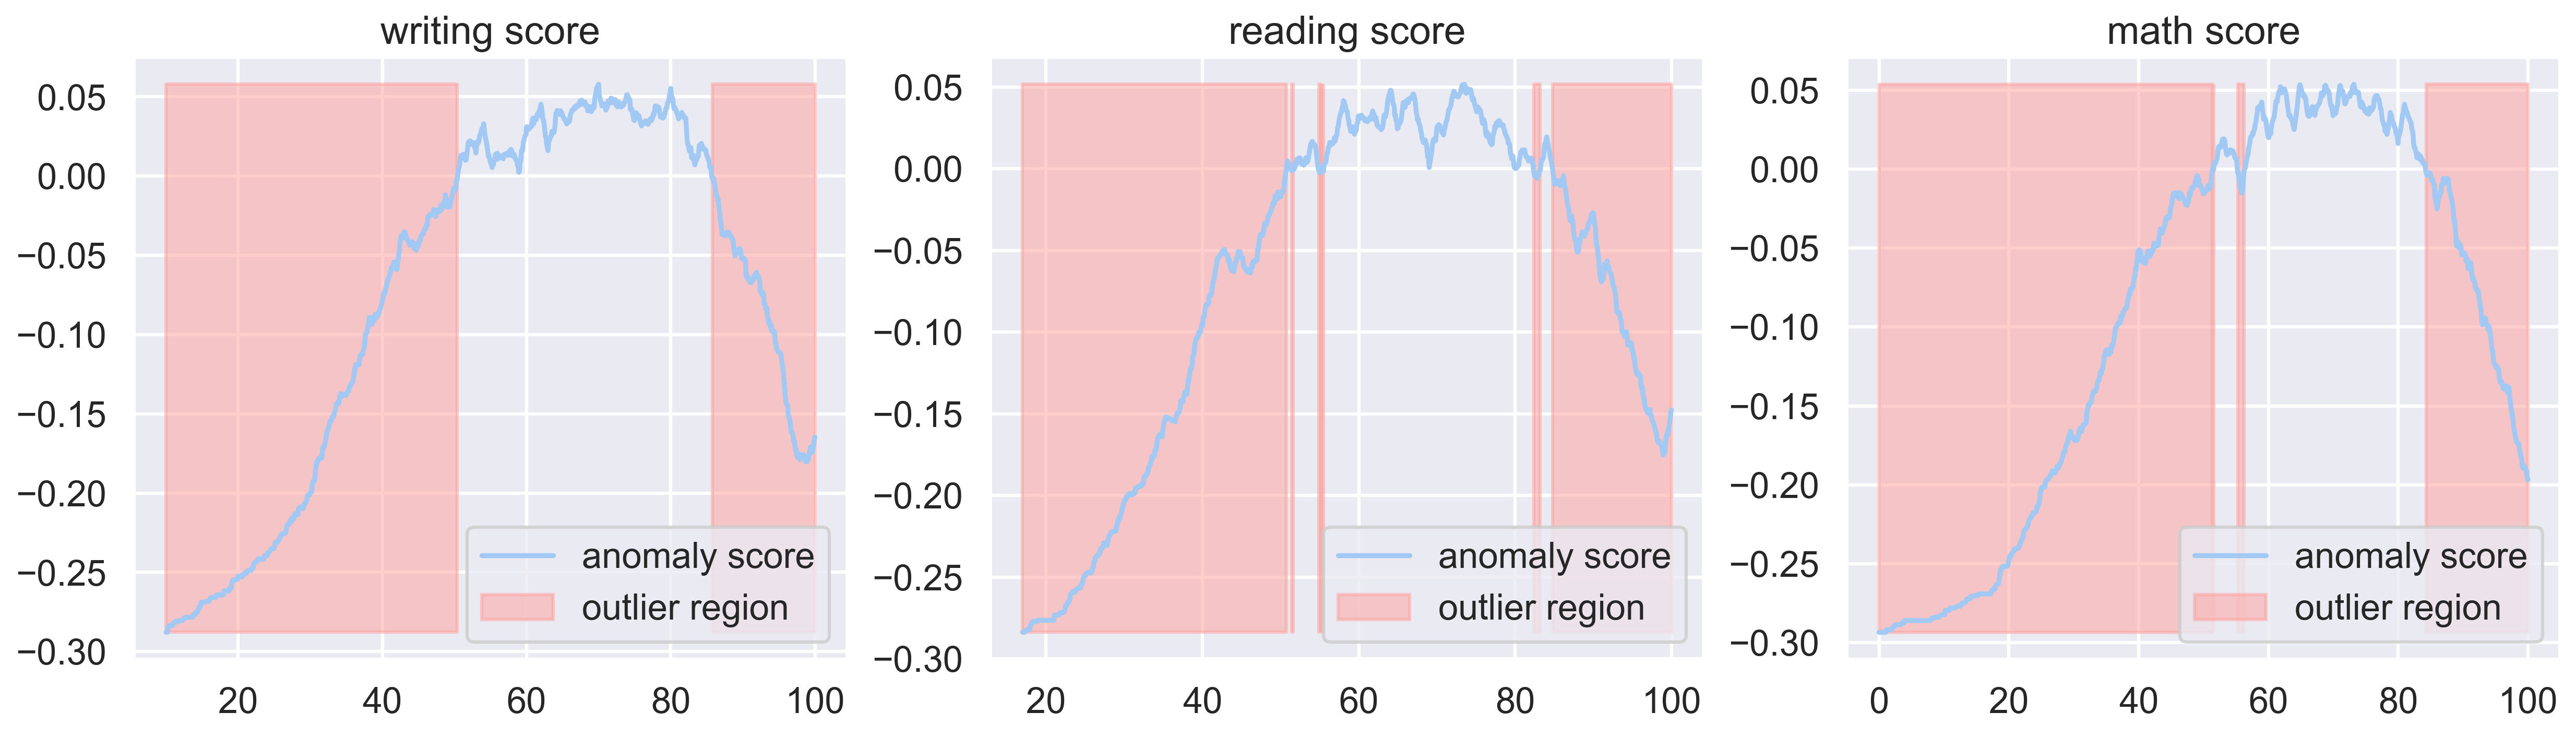

In [ ]:
cols = ['writing score','reading score','math score']

fig, axs = plt.subplots(1,3, figsize=(20,5), facecolor= 'w', edgecolor='k')
axs = axs.ravel()

# 그래프를 그리기 위해서 subplot을 만들고!

# 반복문을 통해서 그래프 그리기

for i, column in enumerate(cols):
    isoltaion_forest = IsolationForest(contamination='auto') # 패키지 불러오기!
    isoltaion_forest.fit(df_2[column].values.reshape(-1,1)) #반복문을 이용해서 해당 값을 행렬 조정하여 fit

    xx = np.linspace(df_2[column].min(), df_2[column].max(), len(df_2)).reshape(-1,1) # 학습에 최대 최소 값을 알려준다. 범위지정
    anomaly_score = isoltaion_forest.decision_function(xx) #이상치에대한 범위 값을 넣어서 탐색할 예정
    outlier = isoltaion_forest.predict(xx) # outlier에 대한 값을 예측

    axs[i].plot(xx, anomaly_score, label='anomaly score') #그래프 그리기 이상치 점수
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                       where =outlier== -1, color='r', alpha=0.5, label='outlier region') #이상치 구간을 지정하는 그래프
    axs[i].legend()
    axs[i].set_title(column)
    print(anomaly_score,'이상치 점수')
    print(outlier, 'outlier')



## DBSCAN( Density- Based Spatial Clutering of Applications with Noise)
- 관측된 데이터에서 밀도기반
- 해당 데이터에 대해서 epsilon(입실론, 반경의 크기)을 정하고 minpoints(민 포인트, 최소 군집의 크기)
- 해당 데이터를 찍고 그 주위를 살펴볼 때 epsilon 길이 반경만큼 데이터를 확인하고, minpoints 만큼 데이터가 있으면 하나의 군집으로 본다.
- minpoints를 조건을 만족시키지 못하는 경우 해당 점들이 경계점이 된다.

In [ ]:
df_3 = pd.read_csv('insurance 2.csv')

In [ ]:
X = df_3[['age','bmi']].values # 나이와 bmi 가지고 이상치 찾기

In [ ]:
db =DBSCAN(eps=3.0, min_samples =10).fit(X) # DBSCAN 알고리즘 간단하게 학습

In [ ]:
df_3label=db.labels_

In [ ]:
pd.Series(df_3label).value_counts() # 26개에 대한 이상치

 0    1312
-1      26
Name: count, dtype: int64

In [ ]:
df_3label

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
[True if l == label else False for l in df_3label]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

In [ ]:
set(df_3label)

{-1, 0}

Text(0.5, 0, 'bmi')

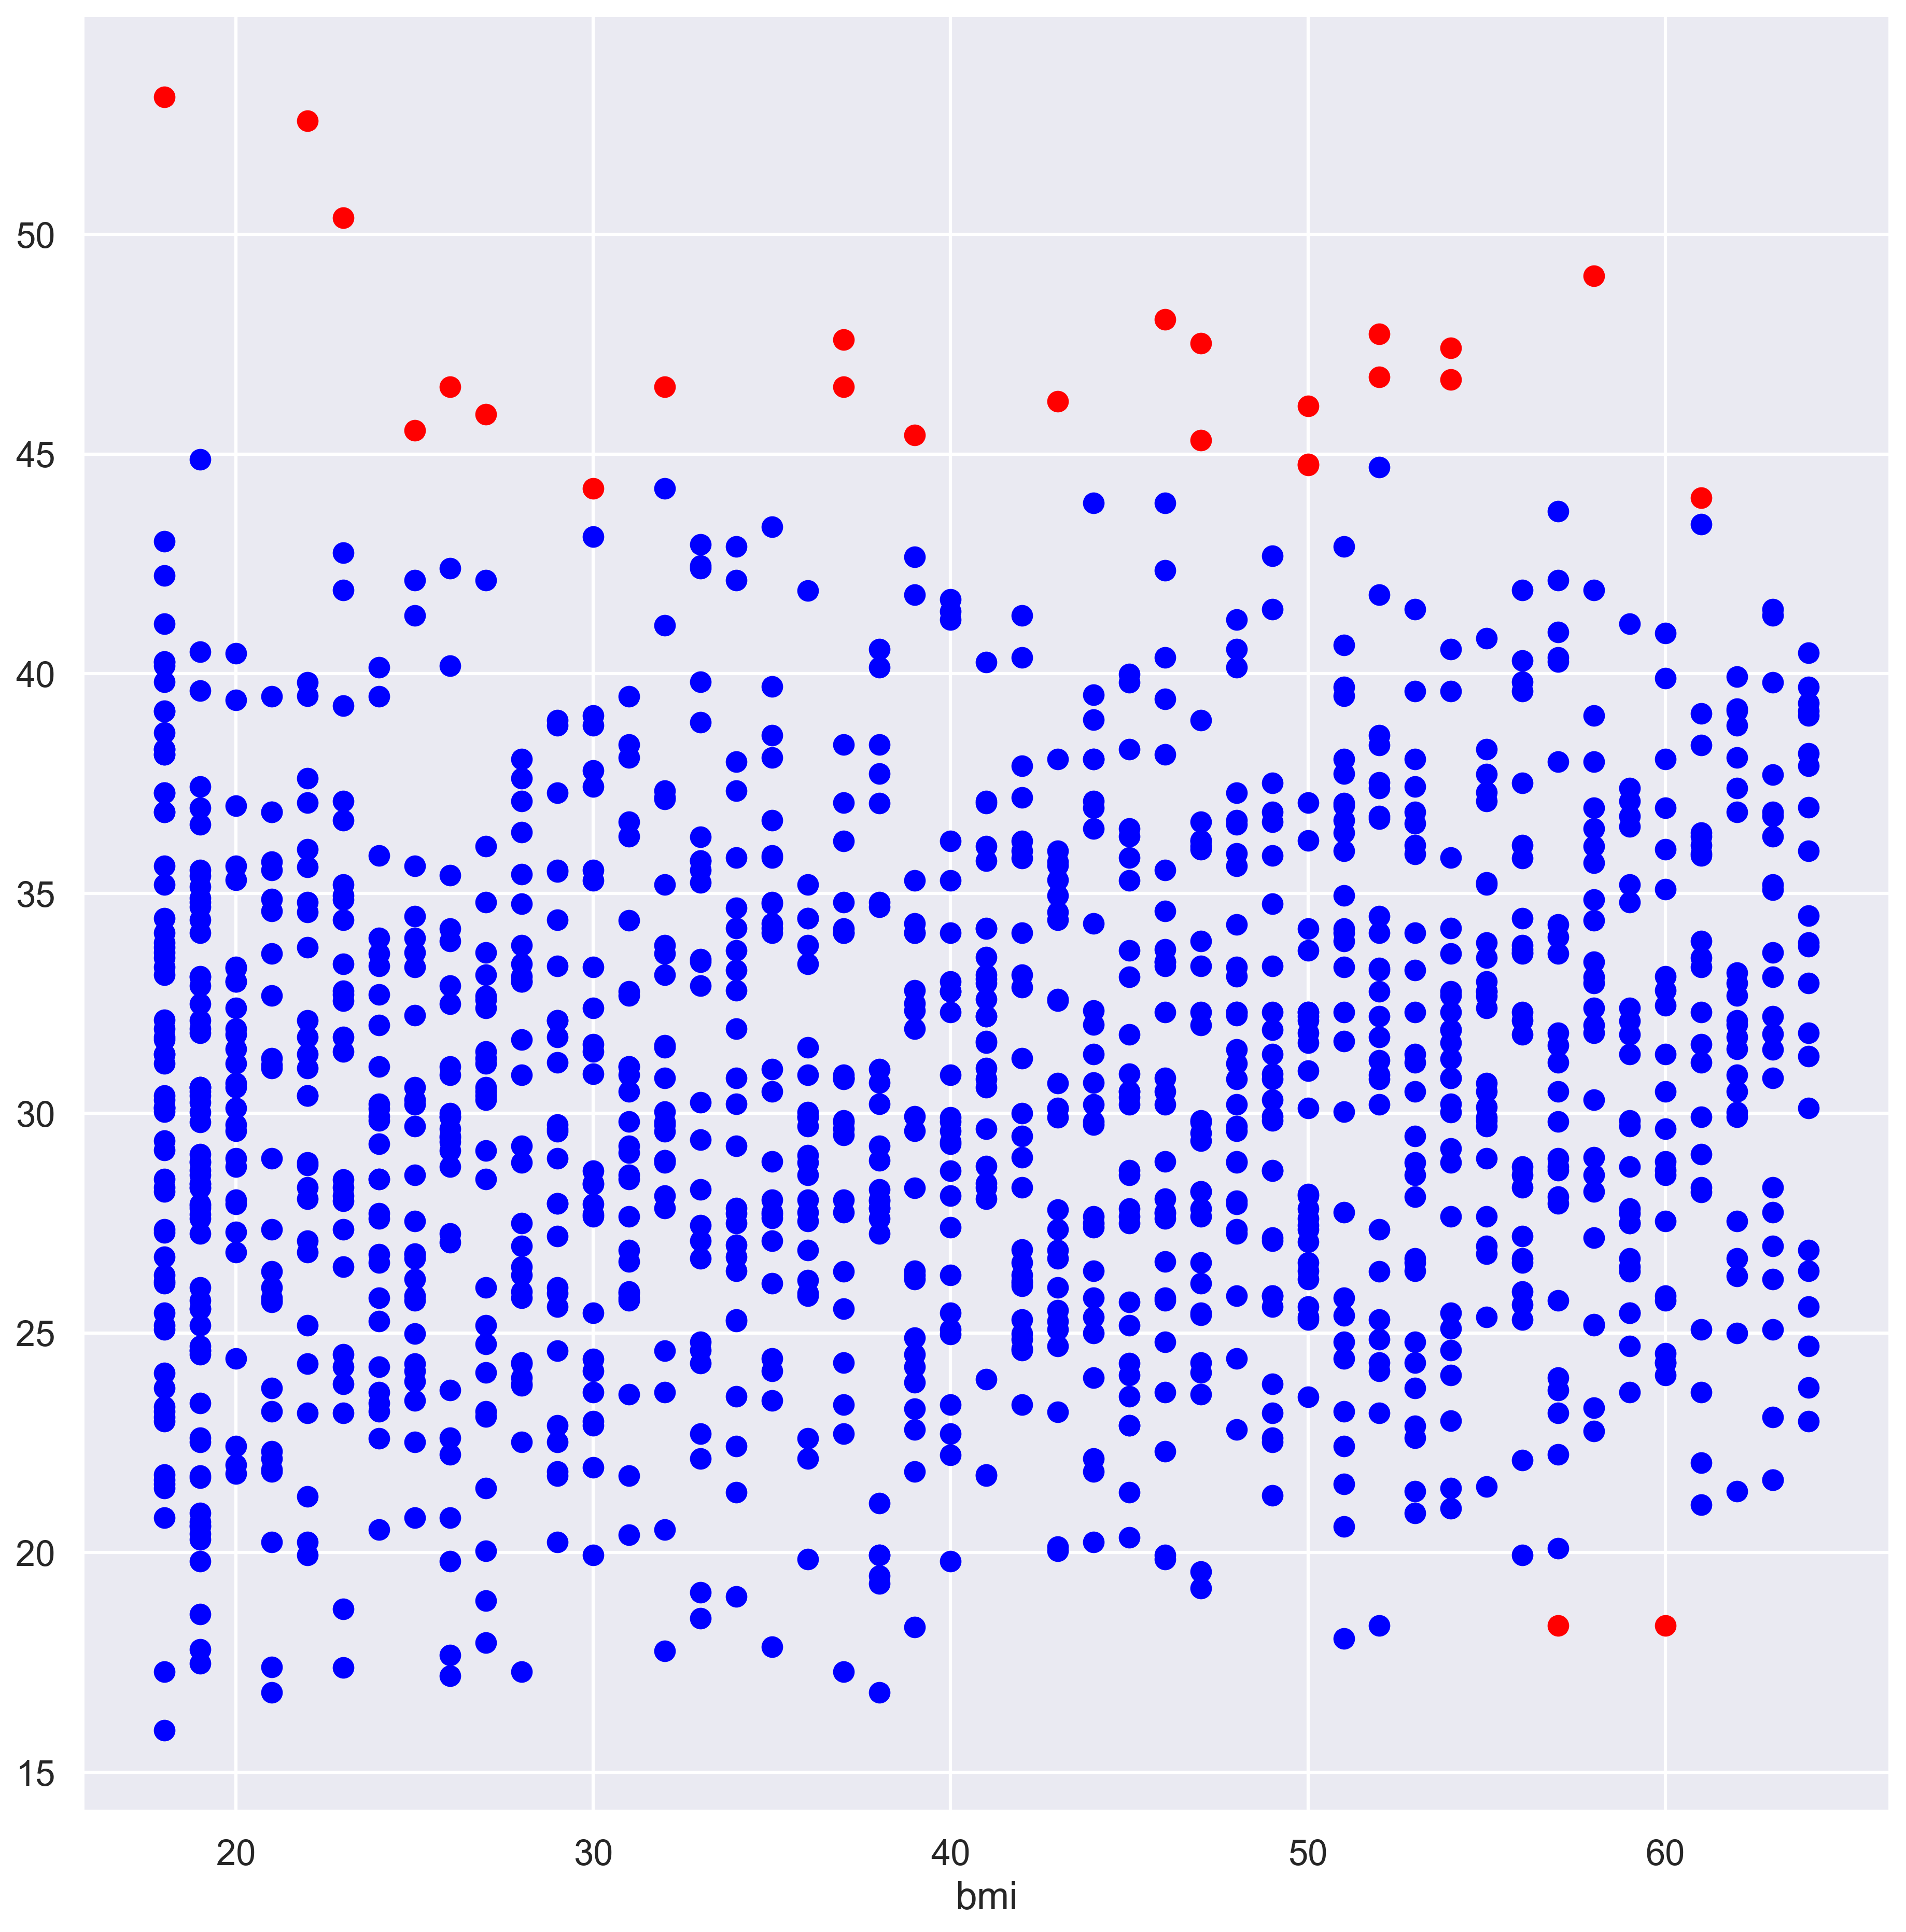

In [ ]:
#시각화로 그래프 그리기
plt.figure(figsize=(15,15))
uq_labels = set(df_3label)
color = ['blue','red']

for color, label in zip(color, uq_labels):
    sample_mask = [True if l == label else False for l in df_3label]
    plt.plot(X[:,0][sample_mask],X[:,1][sample_mask],'o',color=color)
plt.xlabel('Age')
plt.xlabel('bmi')

## LOF 는 코드로 드릴테니 참고하시면 좋을 것 같아요!

- Local_Outlier_Factor
- Reachability Distance  - 주어진 데이터로 k-이웃만큼 데이터 내에 있을 때 실제 거리를 측정하는 방법
- Local Reachability Density - 기준 데이터 근처의 K개의 데이터와 밀접 정도를 측정하는 것
- 이 두개의 지수를 가지고 이상치를 탐지

In [ ]:

df_1 = pd.read_csv('heart 2.csv')
df_1.head()



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df_1[['Age','Cholesterol']].values
y_pred = clf.fit_predict(X)

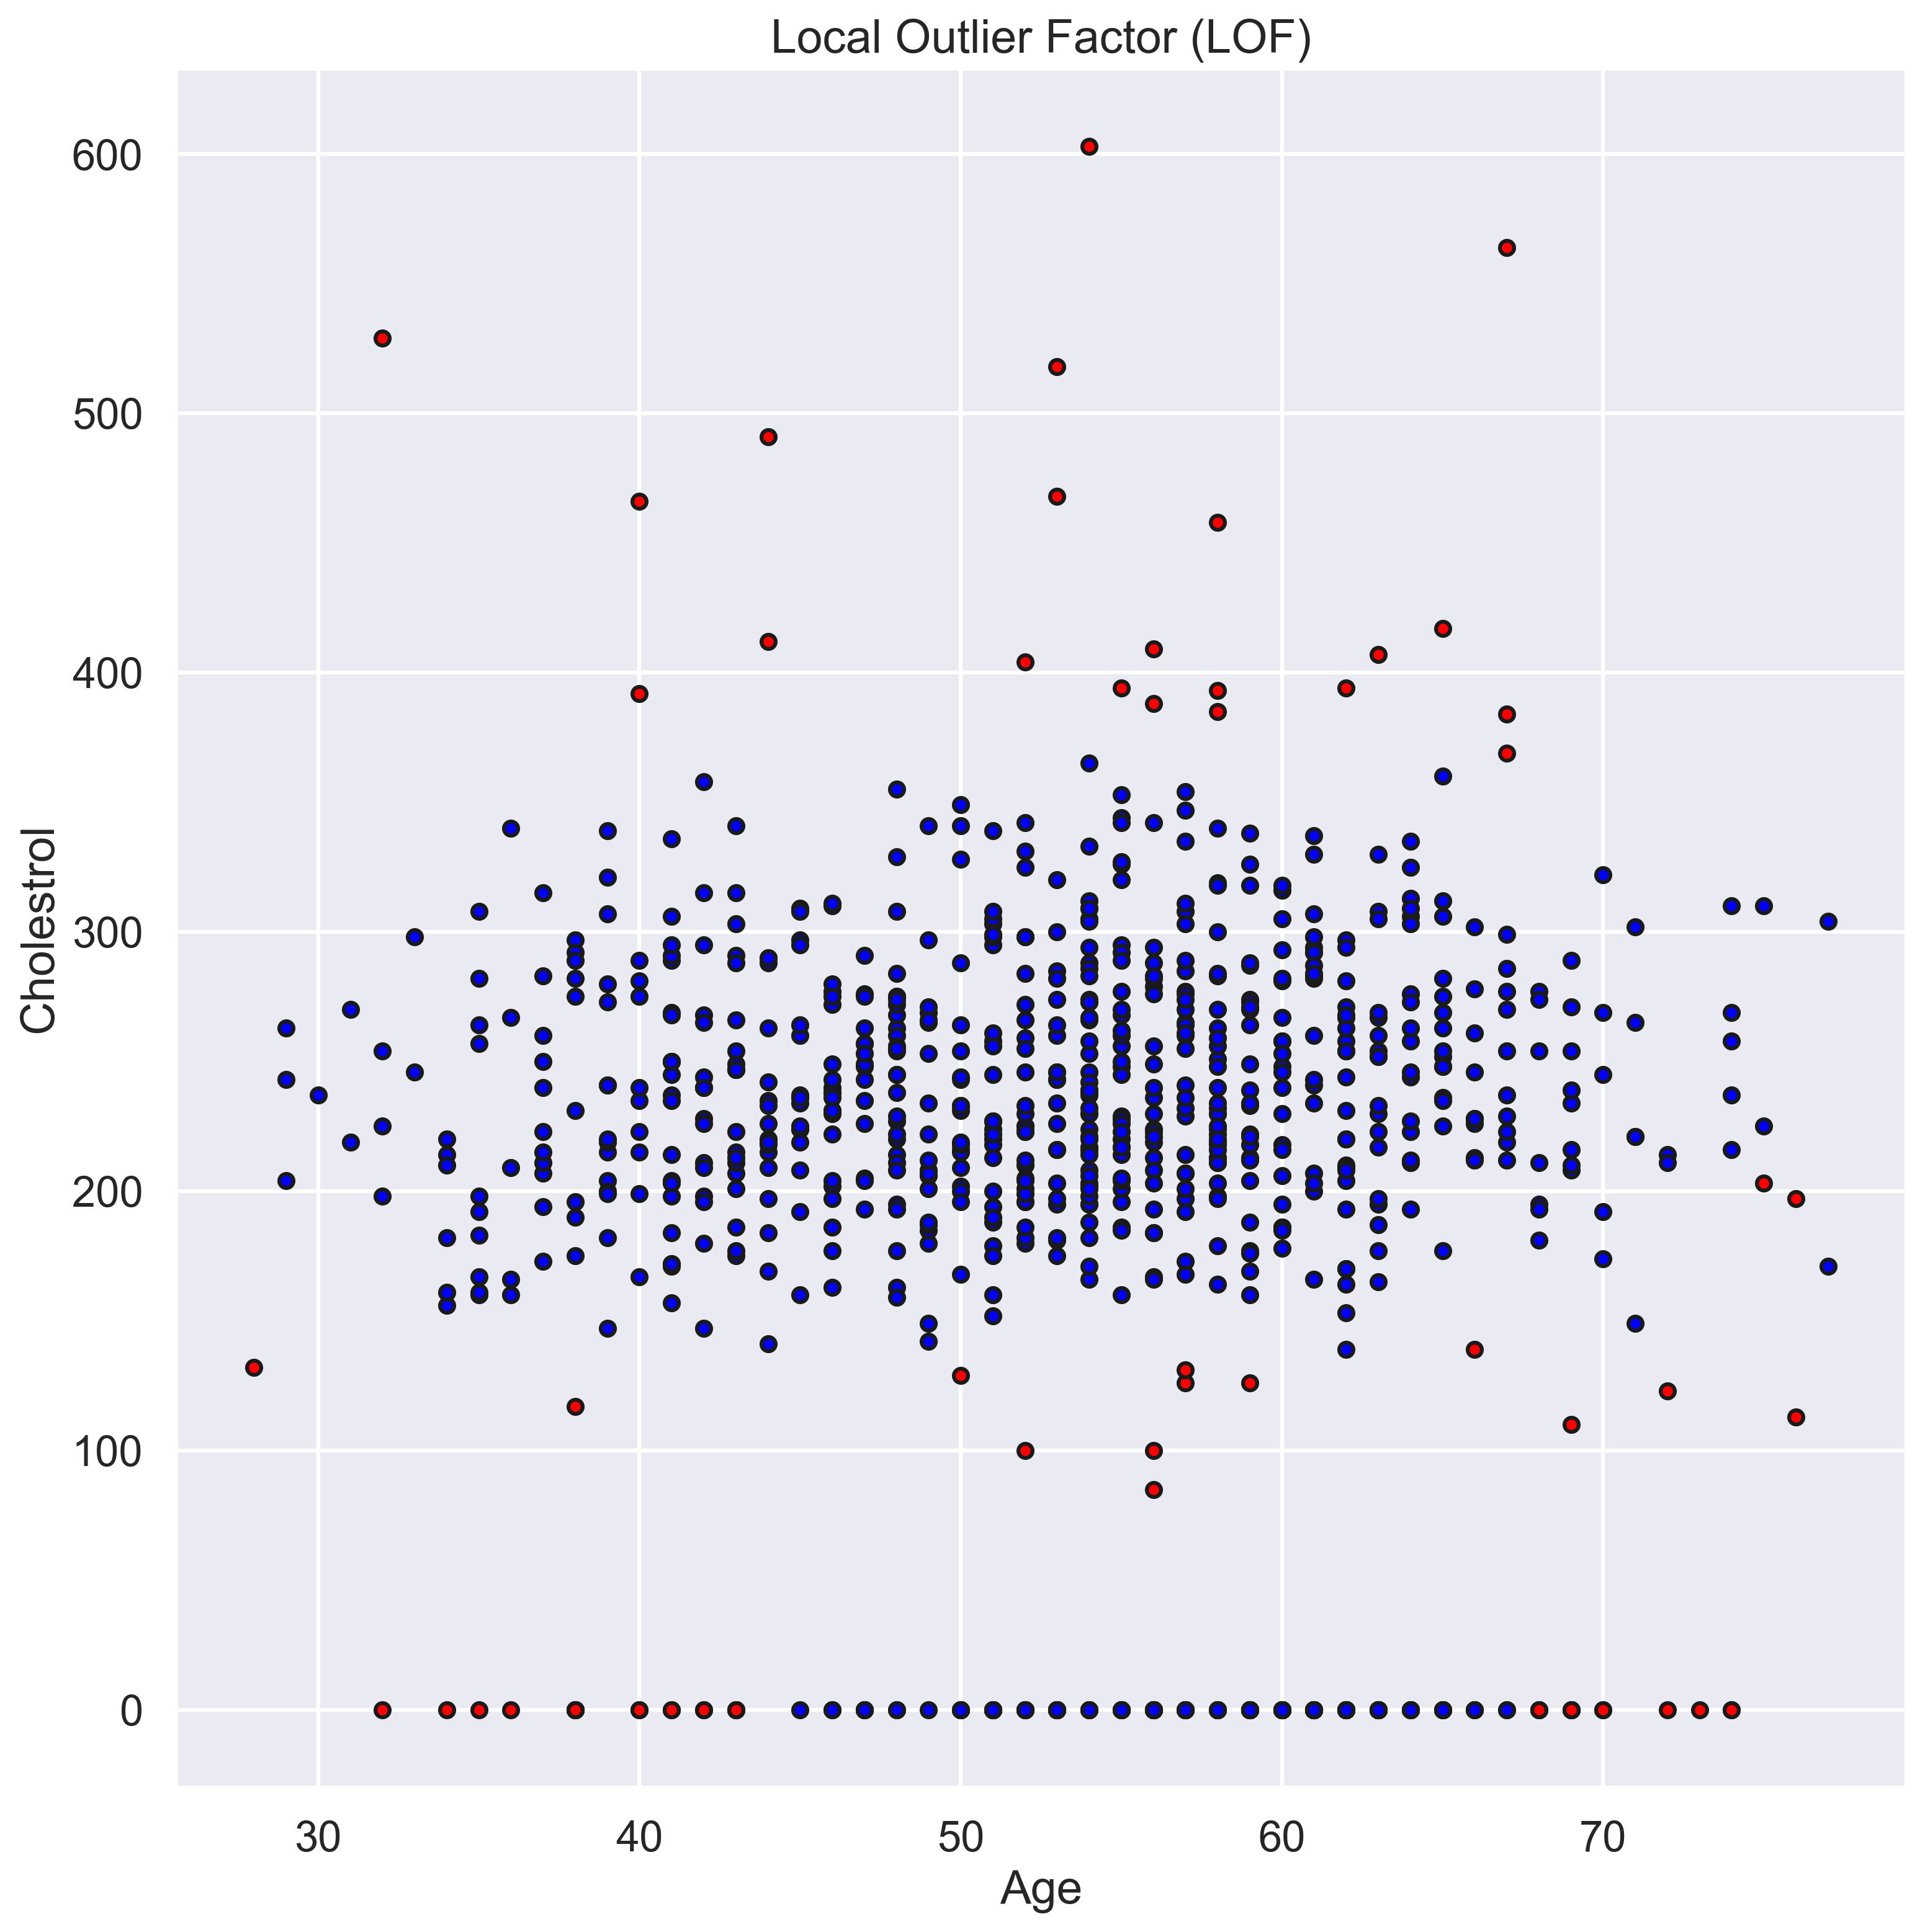

In [ ]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('Cholestrol');
plt.show()

# 거리기반 측정 지표
- scipy에서 재공하는 distance 가지고 간단하게 거리를 측정할 예정!
- numpy나 실제 함수 만들어서 거리측정도 가능하다 -> 기존 지표에서 우리가 직접 만들면 튜닝도 가능하다.

- 거리기반 지표를 가지고 응용할 수 있는 건
- 모델링에 대한 개념들이 대부분 거리 기반으로 쉽게 접근하는 경우가 많다
- k-means, knn 기본적인 알고리즘들이 이 거리기반으로 쉽게 생각해서 이해할 수 있다.

- 협업필터링 CF, User기반 유사도를 측정 -> 넷플릭스 추천의 개념
- 추천에 관한 유사도를 사용할 수 있다.

- NLP에도 코사인 유사도는 흔히 사용하는 케이스
- 그외에 기본적인 거리는 알고리즘에 흔히 사용을 많이 한다.

In [ ]:
from scipy.spatial import distance # 거리 기반 패키지

In [ ]:
df =pd.read_csv('Starbucks_Seoul.csv')

In [ ]:
df[(df['gu_name']=='강남구')].shape #강남구 데이터만 뽑아보기

(80, 5)

In [ ]:
df[(df['gu_name']=='송파구')].shape #송파구는 30개 정도

(30, 5)

In [ ]:
df1 =df[(df['gu_name']=='강남구')]

In [ ]:
df1

,name,address,gu_name,latitude,longitude
0,GS타워,서울특별시 강남구 논현로 508 (역삼동),강남구,37.501859,127.037278
1,SSG마켓도곡R,"서울특별시 강남구 언주로30길 57, 타워팰리스Ⅱ F 지하1층 (도곡동)",강남구,37.490298,127.054895
6,가로수길,"서울특별시 강남구 논현로175길 94, 1~2층 (신사동)",강남구,37.523159,127.021625
17,강남R,서울특별시 강남구 강남대로 390 (역삼동),강남구,37.497711,127.028439
19,강남구청역,"서울특별시 강남구 선릉로 669, 웰빙센터 1층 (논현동)",강남구,37.516585,127.041243
20,강남구청정문,서울특별시 강남구 학동로 419 (청담동),강남구,37.518181,127.045995
21,강남대로,"서울특별시 강남구 강남대로 456, 한석타워 2층 1-2호 (역삼동)",강남구,37.503140,127.025546
24,강남비젼타워,"서울특별시 강남구 테헤란로2길 27, 1층 101호 (역삼동)",강남구,37.496456,127.029689
27,강남오거리,서울특별시 강남구 봉은사로2길 39 (역삼동),강남구,37.502117,127.026672
28,강남우성,서울특별시 강남구 강남대로 328 (역삼동),강남구,37.492396,127.030910


In [ ]:
# 유클리디안 거리 잡기
dist_euclidean = distance.cdist(df1[['latitude','longitude']],
                                df1[['latitude','longitude']], metric = 'euclidean')


#컬럼과 인덱스를 설정해서 거리를 쉽게 볼 수 있게 dataframe으로 만들기

dist_euclidean = pd.DataFrame(data=dist_euclidean, columns = df1['name'])
dist_euclidean.set_index(df1['name'], inplace=True)

In [ ]:
dist_euclidean

name,GS타워,SSG마켓도곡R,가로수길,강남R,강남구청역,강남구청정문,강남대로,강남비젼타워,강남오거리,강남우성,구역삼사거리,국기원사거리,기술센터,논현역사거리,논현힐탑,대치,대치사거리,대치역,대치은마사거리,도곡공원,도곡역,도산가로수길,르네상스사거리,뱅뱅사거리,봉은사로선정릉,봉은사역,삼성,삼성교,삼성도심공항,삼성역,삼성역섬유센터R,삼성현대힐,서울세관사거리,선릉동신빌딩R,선릉로,선릉세화빌딩,선릉역,선정릉역,수서,수서역R,스타필드코엑스몰R,스탈릿대치R,신사가로수,신사역,신사역성일빌딩,신압구정,아크로힐스논현,아크플레이스,압구정,압구정R,압구정로,압구정로데오역,압구정미소,압구정역,압구정윤성빌딩,양재강남빌딩R,역삼대로,역삼럭키,역삼아레나빌딩,역삼역,역삼초교사거리,역삼포스코,을지병원사거리,차병원사거리,청담,청담공원,청담사거리,청담스타R,청담영동대로,코엑스몰,코엑스별마당,코엑스사거리,큰길타워,포스코,포스코사거리,포이,학동사거리,학동역,학여울역,한티역
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GS타워,0.000000,0.021072,0.026433,0.009764,0.015250,0.018504,0.011801,0.009316,0.010609,0.011406,0.006144,0.006239,0.006523,0.017200,0.010919,0.025036,0.021590,0.025961,0.023076,0.009911,0.022333,0.020877,0.007083,0.014137,0.014591,0.029059,0.018992,0.028517,0.022106,0.027809,0.024104,0.019362,0.013129,0.013580,0.009833,0.014050,0.011427,0.011496,0.065944,0.066824,0.025508,0.026307,0.024855,0.021889,0.020736,0.026269,0.007770,0.003192,0.025614,0.025854,0.025072,0.024891,0.024091,0.026517,0.022661,0.016678,0.002111,0.009878,0.005843,0.002369,0.008856,0.004270,0.019338,0.006460,0.026654,0.021969,0.023793,0.023796,0.027920,0.024963,0.024446,0.026520,0.003460,0.021053,0.020932,0.025301,0.020516,0.014368,0.031450,0.018483
SSG마켓도곡R,0.021072,0.000000,0.046763,0.027475,0.029620,0.029269,0.032036,0.025948,0.030598,0.024077,0.016989,0.025151,0.017190,0.038245,0.031052,0.011887,0.013610,0.007701,0.010154,0.013815,0.003124,0.041605,0.016322,0.022545,0.021974,0.026059,0.016750,0.020290,0.019721,0.021661,0.018377,0.023346,0.031223,0.015678,0.016938,0.013976,0.015060,0.022919,0.046912,0.047810,0.020756,0.008843,0.045216,0.042865,0.041794,0.042079,0.023654,0.022096,0.044009,0.043021,0.041708,0.039028,0.043215,0.045227,0.041801,0.018912,0.019213,0.015623,0.016008,0.022358,0.022226,0.023303,0.039016,0.026374,0.034228,0.028567,0.034291,0.037283,0.031896,0.023818,0.020568,0.025590,0.018632,0.015764,0.017418,0.015845,0.036266,0.034306,0.015647,0.006505
가로수길,0.026433,0.046763,0.000000,0.026345,0.020691,0.024873,0.020400,0.027894,0.021639,0.032134,0.032233,0.025620,0.029655,0.012995,0.015740,0.046903,0.042147,0.049965,0.045507,0.036178,0.047331,0.006033,0.030533,0.036219,0.029295,0.042364,0.037562,0.046176,0.038674,0.044237,0.041958,0.032547,0.016285,0.033863,0.030829,0.035358,0.033052,0.026074,0.087496,0.088321,0.041951,0.049893,0.001579,0.007013,0.009090,0.015623,0.023517,0.026942,0.008528,0.012185,0.013589,0.019115,0.006354,0.007409,0.006985,0.040845,0.027908,0.035686,0.030774,0.026135,0.031200,0.026312,0.008077,0.020441,0.029959,0.030152,0.025245,0.020306,0.034838,0.038787,0.040781,0.039268,0.028217,0.040291,0.039065,0.051083,0.016349,0.012463,0.053178,0.042571
강남R,0.009764,0.027475,0.026345,0.000000,0.022807,0.026967,0.006152,0.001771,0.004747,0.005861,0.010578,0.003550,0.016194,0.013931,0.014365,0.033834,0.030893,0.033692,0.031758,0.013773,0.029485,0.020313,0.016641,0.009955,0.024151,0.038820,0.028670,0.038090,0.031852,0.037501,0.033740,0.028984,0.018629,0.023251,0.019568,0.023551,0.021018,0.020737,0.073951,0.074843,0.035225,0.034279,0.024858,0.020029,0.018212,0.031439,0.016424,0.006774,0.028594,0.030014,0.029759,0.031234,0.026350,0.029032,0.025083,0.014991,0.011615,0.012255,0.015014,0.007395,0.005812,0.005522,0.021453,0.012434,0.035283,0.031107,0.031805,0.030590,0.037177,0.034715,0.034180,0.036251,0.013115,0.030604,0.030606,0.025980,0.026426,0.017092,0.040057,0.026632
강남구청역,0.015250,0.029620,0.020691,0.022807,0.000000,0.005013,0.020668,0.023210,0.020534,0.026304,0.020798,0.019656,0.013507,0.020070,0.010293,0.026950,0.022011,0.030920,0.025855,0.023780,0.029278,0.017964,0.014199,0.029359,0.008908,0.022010,0.017201,0.025491,0.018003,0.023555,0.021324,0.011872,0.005842,0.014522,0.012706,0.016221,0.014587,0.006707,0.066915,0.067731,0.021260,0.030590,0.019460,0.020504,0.020825,0.012490,0.007653,0.018016,0.015184,0.013535,0.012122,0.009997,0.015279,0.016602,0.014085,0.031722,0.015078,0.024446,0.015605,

In [ ]:
# 맨하튼 거리 잡기
dist_manhattan = distance.cdist(df1[['latitude','longitude']],
                                df1[['latitude','longitude']], metric = 'cityblock')


#컬럼과 인덱스를 설정해서 거리를 쉽게 볼 수 있게 dataframe으로 만들기

dist_manhattan = pd.DataFrame(data=dist_manhattan, columns = df1['name'])
dist_manhattan.set_index(df1['name'], inplace=True)

dist_manhattan

name,GS타워,SSG마켓도곡R,가로수길,강남R,강남구청역,강남구청정문,강남대로,강남비젼타워,강남오거리,강남우성,구역삼사거리,국기원사거리,기술센터,논현역사거리,논현힐탑,대치,대치사거리,대치역,대치은마사거리,도곡공원,도곡역,도산가로수길,르네상스사거리,뱅뱅사거리,봉은사로선정릉,봉은사역,삼성,삼성교,삼성도심공항,삼성역,삼성역섬유센터R,삼성현대힐,서울세관사거리,선릉동신빌딩R,선릉로,선릉세화빌딩,선릉역,선정릉역,수서,수서역R,스타필드코엑스몰R,스탈릿대치R,신사가로수,신사역,신사역성일빌딩,신압구정,아크로힐스논현,아크플레이스,압구정,압구정R,압구정로,압구정로데오역,압구정미소,압구정역,압구정윤성빌딩,양재강남빌딩R,역삼대로,역삼럭키,역삼아레나빌딩,역삼역,역삼초교사거리,역삼포스코,을지병원사거리,차병원사거리,청담,청담공원,청담사거리,청담스타R,청담영동대로,코엑스몰,코엑스별마당,코엑스사거리,큰길타워,포스코,포스코사거리,포이,학동사거리,학동역,학여울역,한티역
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GS타워,0.000000,0.029179,0.036953,0.012987,0.018691,0.025039,0.013012,0.012993,0.010863,0.015831,0.007523,0.008125,0.007796,0.023373,0.014714,0.027137,0.023011,0.032902,0.025781,0.013086,0.029813,0.029485,0.007892,0.018137,0.020565,0.039059,0.023449,0.033827,0.028563,0.034742,0.029264,0.027123,0.014652,0.016593,0.012493,0.015835,0.013316,0.016178,0.078321,0.079224,0.032308,0.032497,0.034760,0.030878,0.028987,0.027092,0.010231,0.004509,0.032141,0.029724,0.027501,0.027849,0.031559,0.034049,0.029611,0.017260,0.002334,0.011762,0.006564,0.003178,0.012034,0.005834,0.025937,0.008077,0.036786,0.030957,0.031363,0.027906,0.039468,0.033823,0.031288,0.036323,0.003930,0.024589,0.025821,0.031912,0.021182,0.019337,0.035039,0.022836
SSG마켓도곡R,0.029179,0.000000,0.066131,0.033869,0.039939,0.036783,0.042191,0.031364,0.040042,0.026083,0.021656,0.032619,0.024248,0.052552,0.043893,0.016686,0.016955,0.010235,0.013952,0.016093,0.004372,0.058664,0.023010,0.024193,0.027481,0.033003,0.017393,0.027771,0.022507,0.028686,0.023208,0.025421,0.043831,0.019509,0.023073,0.017177,0.020022,0.030792,0.049142,0.050045,0.026252,0.012058,0.063939,0.060056,0.058166,0.056271,0.033191,0.029408,0.061320,0.058903,0.056680,0.050709,0.060738,0.063227,0.058789,0.023316,0.026845,0.017417,0.022615,0.030240,0.025706,0.030736,0.055116,0.037256,0.037400,0.031813,0.041367,0.047986,0.033412,0.027767,0.025232,0.030267,0.026264,0.018533,0.019765,0.022241,0.049007,0.048516,0.021338,0.006663
가로수길,0.036953,0.066131,0.000000,0.032262,0.026193,0.029348,0.023940,0.034767,0.026089,0.040048,0.044475,0.033512,0.041883,0.013579,0.022239,0.064090,0.057020,0.069854,0.062733,0.050038,0.066765,0.007468,0.043121,0.045364,0.038650,0.049730,0.050049,0.058910,0.049661,0.055383,0.054435,0.040711,0.022300,0.046622,0.043058,0.048955,0.046109,0.035339,0.115274,0.116176,0.052999,0.069449,0.002192,0.007839,0.010089,0.019772,0.032941,0.036723,0.011059,0.015644,0.016734,0.022202,0.007187,0.010067,0.007342,0.053027,0.039286,0.048714,0.043516,0.035891,0.040426,0.035395,0.011016,0.028875,0.031139,0.034318,0.025716,0.022259,0.035827,0.047064,0.051659,0.046292,0.039867,0.053740,0.051431,0.068864,0.017124,0.017616,0.071992,0.059788
강남R,0.012987,0.033869,0.032262,0.000000,0.031678,0.038026,0.008322,0.002505,0.006173,0.007786,0.012213,0.004862,0.020783,0.018683,0.017670,0.035729,0.035998,0.037592,0.032995,0.017776,0.034503,0.024795,0.020879,0.013102,0.033552,0.052046,0.036436,0.046814,0.041550,0.047729,0.042251,0.040110,0.024390,0.029580,0.025480,0.028822,0.026302,0.029165,0.083011,0.083914,0.045295,0.037187,0.030070,0.026187,0.024297,0.038406,0.023217,0.008478,0.029693,0.034278,0.035368,0.040836,0.026869,0.029358,0.025244,0.020765,0.014848,0.016452,0.018006,0.009809,0.008163,0.007153,0.021658,0.017255,0.049773,0.043944,0.044350,0.040893,0.052455,0.046810,0.044275,0.049310,0.016917,0.037576,0.038808,0.036602,0.034169,0.019229,0.040381,0.027526
강남구청역,0.018691,0.039939,0.026193,0.031678,0.000000,0.006348,0.029142,0.031684,0.029039,0.034522,0.023040,0.026816,0.015690,0.025427,0.014009,0.037897,0.030828,0.043662,0.036541,0.023846,0.040573,0.018725,0.016929,0.036828,0.012458,0.023538,0.023857,0.032718,0.023469,0.029191,0.028243,0.014518,0.007288,0.020430,0.016866,0.022762,0.019916,0.009146,0.089081,0.089984,0.026807,0.043257,0.024000,0.020883,0.023133,0.016332,0.008461,0.023200,0.021381,0.018964,0.016741,0.010770,0.020799,0.023289,0.018851,0.035951,0.016830,0.026230,0.017324,

In [ ]:
# 민코프스키 거리 잡기
dist_minkowski = distance.cdist(df1[['latitude','longitude']],
                                df1[['latitude','longitude']], metric = 'minkowski',p = 1.5)


#컬럼과 인덱스를 설정해서 거리를 쉽게 볼 수 있게 dataframe으로 만들기

dist_minkowski  = pd.DataFrame(data=dist_minkowski, columns = df1['name'])
dist_minkowski .set_index(df1['name'], inplace=True)

dist_minkowski

name,GS타워,SSG마켓도곡R,가로수길,강남R,강남구청역,강남구청정문,강남대로,강남비젼타워,강남오거리,강남우성,구역삼사거리,국기원사거리,기술센터,논현역사거리,논현힐탑,대치,대치사거리,대치역,대치은마사거리,도곡공원,도곡역,도산가로수길,르네상스사거리,뱅뱅사거리,봉은사로선정릉,봉은사역,삼성,삼성교,삼성도심공항,삼성역,삼성역섬유센터R,삼성현대힐,서울세관사거리,선릉동신빌딩R,선릉로,선릉세화빌딩,선릉역,선정릉역,수서,수서역R,스타필드코엑스몰R,스탈릿대치R,신사가로수,신사역,신사역성일빌딩,신압구정,아크로힐스논현,아크플레이스,압구정,압구정R,압구정로,압구정로데오역,압구정미소,압구정역,압구정윤성빌딩,양재강남빌딩R,역삼대로,역삼럭키,역삼아레나빌딩,역삼역,역삼초교사거리,역삼포스코,을지병원사거리,차병원사거리,청담,청담공원,청담사거리,청담스타R,청담영동대로,코엑스몰,코엑스별마당,코엑스사거리,큰길타워,포스코,포스코사거리,포이,학동사거리,학동역,학여울역,한티역
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GS타워,0.000000,0.023409,0.029501,0.010644,0.016068,0.020332,0.012012,0.010385,0.010632,0.012685,0.006471,0.006738,0.006809,0.018937,0.011974,0.025372,0.021795,0.027717,0.023573,0.010769,0.024386,0.023418,0.007230,0.015170,0.016350,0.031831,0.020066,0.029689,0.023793,0.029518,0.025306,0.021631,0.013408,0.014291,0.010509,0.014389,0.011825,0.012872,0.068684,0.069557,0.027227,0.027801,0.027745,0.024539,0.023142,0.026355,0.008432,0.003581,0.027236,0.026638,0.025485,0.025438,0.026085,0.028465,0.024510,0.016742,0.002150,0.010298,0.005978,0.002593,0.009750,0.004713,0.021162,0.006859,0.029562,0.024615,0.025833,0.024677,0.031332,0.027445,0.026207,0.029306,0.003552,0.021803,0.022109,0.026959,0.020587,0.015748,0.032102,0.019533
SSG마켓도곡R,0.023409,0.000000,0.052489,0.029011,0.032493,0.031142,0.034769,0.027197,0.033116,0.024397,0.018182,0.027114,0.019271,0.042328,0.034846,0.013293,0.014431,0.008392,0.011238,0.014295,0.003488,0.046631,0.018292,0.022794,0.023334,0.027814,0.016824,0.022414,0.020272,0.023567,0.019591,0.023686,0.034918,0.016616,0.018669,0.014740,0.016414,0.025100,0.047192,0.048089,0.022142,0.009752,0.050751,0.047891,0.046542,0.045985,0.026447,0.024095,0.049037,0.047533,0.045920,0.042108,0.048358,0.050476,0.046791,0.019971,0.021437,0.015950,0.017959,0.024561,0.022944,0.025308,0.043770,0.029587,0.034757,0.029156,0.035915,0.040063,0.032086,0.024651,0.021678,0.026615,0.020880,0.016361,0.017874,0.017719,0.039824,0.038507,0.017255,0.006520
가로수길,0.029501,0.052489,0.000000,0.027748,0.022080,0.025848,0.021160,0.029581,0.022659,0.034076,0.035746,0.027722,0.033265,0.013067,0.017659,0.051773,0.046306,0.055765,0.050444,0.040167,0.053060,0.006380,0.034249,0.038484,0.031820,0.043947,0.040981,0.049435,0.041517,0.046996,0.045240,0.034564,0.017995,0.037514,0.034391,0.039276,0.036850,0.028671,0.094977,0.095805,0.044731,0.055566,0.001756,0.007165,0.009269,0.016670,0.026272,0.029704,0.009193,0.013080,0.014343,0.019759,0.006514,0.008157,0.007032,0.044053,0.031254,0.039373,0.034541,0.028917,0.033622,0.028832,0.008908,0.022931,0.030096,0.030970,0.025284,0.020637,0.034937,0.040712,0.043531,0.040794,0.031657,0.043979,0.042392,0.056031,0.016446,0.013986,0.058444,0.047620
강남R,0.010644,0.029011,0.027748,0.000000,0.025374,0.030226,0.006759,0.001988,0.005124,0.006386,0.010913,0.003923,0.017380,0.015244,0.015155,0.034090,0.031969,0.034405,0.031901,0.014817,0.030554,0.021369,0.017694,0.010801,0.026872,0.042473,0.030644,0.040173,0.034425,0.040108,0.035848,0.032189,0.020166,0.024863,0.021132,0.024799,0.022325,0.023212,0.075645,0.076532,0.037836,0.034747,0.026062,0.021668,0.019881,0.033083,0.018432,0.007196,0.028720,0.030860,0.031003,0.033790,0.026394,0.029053,0.025091,0.016656,0.012445,0.013416,0.015692,0.008052,0.006501,0.005950,0.021466,0.013827,0.039555,0.034897,0.035452,0.033424,0.041682,0.038082,0.036829,0.039930,0.014106,0.032266,0.032683,0.029106,0.028452,0.017495,0.040075,0.026728
강남구청역,0.016068,0.032493,0.022080,0.025374,0.000000,0.005350,0.023165,0.025608,0.023049,0.028504,0.021196,0.021681,0.013963,0.021425,0.011340,0.030165,0.024588,0.034680,0.029012,0.023782,0.032536,0.018055,0.014809,0.031214,0.009944,0.022236,0.019123,0.027359,0.019452,0.024923,0.023202,0.012497,0.006198,0.016258,0.013838,0.018137,0.016095,0.007397,0.072976,0.073798,0.022651,0.034334,0.020552,0.020535,0.021240,0.013513,0.007795,0.019363,0.017007,0.015123,0.013449,0.010116,0.016836,0.018560,0.015398,0.032540,0.015399,0.024716,0.015913,

In [ ]:
# 체비쇼프 거리 잡기
dist_chebyshev = distance.cdist(df1[['latitude','longitude']],
                                df1[['latitude','longitude']], metric = 'chebyshev')


#컬럼과 인덱스를 설정해서 거리를 쉽게 볼 수 있게 dataframe으로 만들기

dist_chebyshev  = pd.DataFrame(data=dist_chebyshev, columns = df1['name'])
dist_chebyshev.set_index(df1['name'], inplace=True)

dist_chebyshev

name,GS타워,SSG마켓도곡R,가로수길,강남R,강남구청역,강남구청정문,강남대로,강남비젼타워,강남오거리,강남우성,구역삼사거리,국기원사거리,기술센터,논현역사거리,논현힐탑,대치,대치사거리,대치역,대치은마사거리,도곡공원,도곡역,도산가로수길,르네상스사거리,뱅뱅사거리,봉은사로선정릉,봉은사역,삼성,삼성교,삼성도심공항,삼성역,삼성역섬유센터R,삼성현대힐,서울세관사거리,선릉동신빌딩R,선릉로,선릉세화빌딩,선릉역,선정릉역,수서,수서역R,스타필드코엑스몰R,스탈릿대치R,신사가로수,신사역,신사역성일빌딩,신압구정,아크로힐스논현,아크플레이스,압구정,압구정R,압구정로,압구정로데오역,압구정미소,압구정역,압구정윤성빌딩,양재강남빌딩R,역삼대로,역삼럭키,역삼아레나빌딩,역삼역,역삼초교사거리,역삼포스코,을지병원사거리,차병원사거리,청담,청담공원,청담사거리,청담스타R,청담영동대로,코엑스몰,코엑스별마당,코엑스사거리,큰길타워,포스코,포스코사거리,포이,학동사거리,학동역,학여울역,한티역
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GS타워,0.000000,0.017617,0.021300,0.008839,0.014726,0.016322,0.011732,0.007589,0.010606,0.009463,0.005936,0.005783,0.006363,0.015055,0.009698,0.024940,0.021539,0.024596,0.022894,0.009054,0.020120,0.015503,0.007030,0.013274,0.011131,0.025918,0.018273,0.027892,0.020636,0.026586,0.023373,0.015441,0.013028,0.013131,0.009299,0.013918,0.011236,0.008896,0.064473,0.065372,0.024177,0.025305,0.019993,0.016535,0.016715,0.026256,0.007121,0.002369,0.024424,0.025508,0.024941,0.024690,0.022197,0.024882,0.020934,0.016667,0.002097,0.009650,0.005791,0.002120,0.007753,0.003696,0.017304,0.006173,0.022504,0.016796,0.021776,0.023357,0.020297,0.021967,0.022997,0.022831,0.003422,0.020688,0.020150,0.024048,0.020505,0.012790,0.031217,0.017777
SSG마켓도곡R,0.017617,0.000000,0.033270,0.026456,0.026287,0.027883,0.029349,0.025206,0.028223,0.023985,0.016030,0.023400,0.012994,0.032672,0.022633,0.009364,0.013033,0.006979,0.008675,0.013586,0.002503,0.031599,0.012423,0.022480,0.020995,0.024702,0.016737,0.017496,0.019488,0.019717,0.017452,0.023244,0.024589,0.015023,0.014755,0.013478,0.013641,0.020457,0.046856,0.047755,0.019692,0.007688,0.032385,0.034152,0.034332,0.037817,0.018682,0.019987,0.035985,0.037069,0.036502,0.036251,0.033758,0.036443,0.032495,0.018210,0.015520,0.015506,0.011826,0.019737,0.021898,0.021313,0.028865,0.019522,0.034065,0.028357,0.033337,0.034918,0.031858,0.023417,0.019852,0.025053,0.014195,0.015462,0.017233,0.012487,0.032066,0.024351,0.013599,0.006503
가로수길,0.021300,0.033270,0.000000,0.025448,0.019618,0.024370,0.020019,0.026704,0.021042,0.030763,0.027236,0.023642,0.022016,0.012981,0.011602,0.040592,0.037192,0.040249,0.038547,0.030354,0.035773,0.005797,0.022683,0.034574,0.026784,0.041571,0.033925,0.043545,0.036288,0.042239,0.039026,0.031093,0.014028,0.028784,0.024952,0.029571,0.026888,0.022935,0.080126,0.081025,0.039830,0.040958,0.001307,0.006957,0.009027,0.014816,0.018762,0.023439,0.007935,0.011436,0.013092,0.018812,0.006290,0.006485,0.006976,0.037967,0.021536,0.030950,0.022072,0.022358,0.029053,0.023438,0.007020,0.015127,0.029935,0.029814,0.025240,0.020202,0.034824,0.037620,0.038650,0.038484,0.020792,0.036341,0.035802,0.045348,0.016329,0.009105,0.046869,0.033430
강남R,0.008839,0.026456,0.025448,0.000000,0.018874,0.020470,0.005429,0.001255,0.004406,0.005315,0.010425,0.003056,0.015202,0.012467,0.013847,0.033778,0.030378,0.033435,0.031733,0.012870,0.028959,0.019651,0.015869,0.009126,0.019970,0.034757,0.027111,0.036731,0.029474,0.035425,0.032212,0.024279,0.017176,0.021970,0.018138,0.022757,0.020074,0.016121,0.073312,0.074211,0.033016,0.034144,0.024141,0.018491,0.016421,0.030404,0.011948,0.006469,0.028572,0.029656,0.029089,0.028838,0.026345,0.029030,0.025082,0.012519,0.010936,0.010950,0.014630,0.006719,0.004558,0.005143,0.021452,0.010321,0.026652,0.023000,0.025924,0.027505,0.028010,0.030806,0.031836,0.031670,0.012261,0.029527,0.028988,0.019900,0.024653,0.016938,0.040055,0.026616
강남구청역,0.014726,0.026287,0.019618,0.018874,0.000000,0.004752,0.015697,0.020129,0.014571,0.024189,0.020661,0.017068,0.013293,0.019020,0.008981,0.020974,0.017574,0.023031,0.018929,0.023780,0.024418,0.017948,0.013864,0.028000,0.007166,0.021953,0.014307,0.023927,0.016670,0.022621,0.019408,0.011475,0.005590,0.011264,0.011532,0.012809,0.012646,0.005830,0.060507,0.061407,0.020212,0.021917,0.018733,0.020501,0.020680,0.011530,0.007604,0.016865,0.011683,0.010782,0.010216,0.009964,0.013328,0.013133,0.012642,0.031393,0.014962,0.024376,0.015498,

In [ ]:
# 마할라노비스 거리 잡기
dist_mahalanobis = distance.cdist(df1[['latitude','longitude']],
                                df1[['latitude','longitude']], metric = 'mahalanobis')


#컬럼과 인덱스를 설정해서 거리를 쉽게 볼 수 있게 dataframe으로 만들기

dist_mahalanobis  = pd.DataFrame(data=dist_mahalanobis, columns = df1['name'])
dist_mahalanobis.set_index(df1['name'], inplace=True)

dist_mahalanobis

name,GS타워,SSG마켓도곡R,가로수길,강남R,강남구청역,강남구청정문,강남대로,강남비젼타워,강남오거리,강남우성,구역삼사거리,국기원사거리,기술센터,논현역사거리,논현힐탑,대치,대치사거리,대치역,대치은마사거리,도곡공원,도곡역,도산가로수길,르네상스사거리,뱅뱅사거리,봉은사로선정릉,봉은사역,삼성,삼성교,삼성도심공항,삼성역,삼성역섬유센터R,삼성현대힐,서울세관사거리,선릉동신빌딩R,선릉로,선릉세화빌딩,선릉역,선정릉역,수서,수서역R,스타필드코엑스몰R,스탈릿대치R,신사가로수,신사역,신사역성일빌딩,신압구정,아크로힐스논현,아크플레이스,압구정,압구정R,압구정로,압구정로데오역,압구정미소,압구정역,압구정윤성빌딩,양재강남빌딩R,역삼대로,역삼럭키,역삼아레나빌딩,역삼역,역삼초교사거리,역삼포스코,을지병원사거리,차병원사거리,청담,청담공원,청담사거리,청담스타R,청담영동대로,코엑스몰,코엑스별마당,코엑스사거리,큰길타워,포스코,포스코사거리,포이,학동사거리,학동역,학여울역,한티역
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GS타워,0.000000,1.295185,1.862271,0.784888,1.420458,1.728714,0.749526,0.798625,0.695873,1.056598,0.507688,0.490636,0.477383,1.041583,0.825933,1.602069,1.473570,1.565840,1.457198,0.769045,1.344192,1.406140,0.495315,1.323047,1.281965,2.363999,1.424680,2.075854,1.725273,2.106312,1.784637,1.674615,1.135563,1.010393,0.755647,0.989182,0.821723,1.051034,4.059623,4.116677,1.954870,1.597409,1.749173,1.402555,1.292889,2.330290,0.727690,0.282769,2.081108,2.208917,2.182496,2.281048,1.885018,2.114816,1.777817,1.502596,0.133893,0.829672,0.368077,0.192286,0.826735,0.354559,1.472209,0.526231,2.476015,2.003500,2.228136,2.200668,2.518785,2.050567,1.891097,2.209550,0.244762,1.516280,1.569102,2.047739,1.847450,1.088856,1.988416,1.122244
SSG마켓도곡R,1.295185,0.000000,3.073360,1.669364,2.238904,2.375383,1.925033,1.586980,1.838420,1.541027,1.023533,1.511748,1.168109,2.332957,2.020200,1.090649,1.270357,0.618527,0.944915,0.857110,0.269659,2.659754,1.113073,1.544181,1.789775,2.436490,1.510259,1.890567,1.814460,2.028173,1.717732,2.037351,2.169605,1.281613,1.260771,1.152029,1.159197,1.740995,3.047032,3.106419,1.940395,0.732338,2.963386,2.685372,2.586143,3.215896,1.646445,1.329200,3.129518,3.174891,3.116205,3.079006,2.988968,3.186277,2.883308,1.417037,1.196826,0.987523,1.035529,1.351001,1.383015,1.400410,2.623187,1.704695,2.983483,2.472916,2.858947,2.967321,2.881580,2.200317,1.916009,2.370159,1.189553,1.458530,1.600754,1.453952,2.732684,2.264038,1.295993,0.584697
가로수길,1.862271,3.073360,0.000000,2.176562,1.248270,1.535193,1.726157,2.277528,1.804759,2.623804,2.344322,2.007781,1.914290,1.148643,1.056371,2.849364,2.547062,3.116011,2.783929,2.618016,3.032117,0.494939,1.970391,2.946758,1.760520,2.620086,2.260004,2.781579,2.327213,2.675903,2.521946,1.969226,0.990780,2.069164,1.918961,2.172971,2.053049,1.576967,5.257753,5.306992,2.532022,3.088083,0.113210,0.642553,0.831605,1.196445,1.472468,2.003349,0.667874,0.945288,1.017235,1.371607,0.448309,0.610789,0.453077,3.224881,1.917233,2.647009,2.039980,1.918231,2.467962,1.995244,0.490107,1.374515,2.019652,1.888892,1.686158,1.406849,2.281019,2.369048,2.459964,2.424494,1.893499,2.424675,2.347370,3.862218,1.061941,0.810047,3.214584,2.683215
강남R,0.784888,1.669364,2.176562,0.000000,2.111833,2.455652,0.462796,0.116815,0.374216,0.451629,0.658643,0.295758,1.255875,1.060666,1.338634,2.298533,2.221524,2.128867,2.140513,0.828278,1.825858,1.681703,1.264968,0.775056,2.056171,3.148685,2.203742,2.846956,2.509035,2.886343,2.560572,2.451910,1.744702,1.788886,1.538675,1.754393,1.594200,1.810534,4.660325,4.718937,2.736705,2.192736,2.069261,1.570330,1.395971,2.926982,1.462673,0.513857,2.578195,2.761899,2.758615,2.925163,2.344367,2.588267,2.245480,1.081257,0.897523,0.738594,1.101544,0.592658,0.366480,0.432012,1.921902,1.151910,3.209603,2.758382,2.937186,2.862447,3.278896,2.834807,2.674031,2.992599,1.021918,2.285647,2.347833,1.777639,2.474176,1.568105,2.663271,1.739889
강남구청역,1.420458,2.238904,1.248270,2.111833,0.000000,0.384094,1.818411,2.164224,1.839645,2.463397,1.902017,1.833085,1.148607,1.538476,0.850318,1.705062,1.377774,2.085668,1.678928,2.124323,2.109820,1.169373,1.191621,2.742400,0.555859,1.416759,1.059311,1.533992,1.081798,1.428939,1.281920,0.723167,0.441971,1.000434,0.979833,1.128954,1.081634,0.498378,4.025468,4.073259,1.283800,2.026840,1.182177,1.369421,1.453714,0.979176,0.699557,1.686417,0.965314,0.946900,0.879960,0.875483,0.926126,1.043162,0.848213,2.914642,1.381099,2.220378,1.352483,

In [ ]:
# 코사인 거리 잡기
dist_cosine = distance.cdist(df1[['latitude','longitude']],
                                df1[['latitude','longitude']], metric = 'cosine')


#컬럼과 인덱스를 설정해서 거리를 쉽게 볼 수 있게 dataframe으로 만들기

dist_cosine  = pd.DataFrame(data=dist_cosine, columns = df1['name'])
dist_cosine.set_index(df1['name'], inplace=True)

dist_cosine

name,GS타워,SSG마켓도곡R,가로수길,강남R,강남구청역,강남구청정문,강남대로,강남비젼타워,강남오거리,강남우성,구역삼사거리,국기원사거리,기술센터,논현역사거리,논현힐탑,대치,대치사거리,대치역,대치은마사거리,도곡공원,도곡역,도산가로수길,르네상스사거리,뱅뱅사거리,봉은사로선정릉,봉은사역,삼성,삼성교,삼성도심공항,삼성역,삼성역섬유센터R,삼성현대힐,서울세관사거리,선릉동신빌딩R,선릉로,선릉세화빌딩,선릉역,선정릉역,수서,수서역R,스타필드코엑스몰R,스탈릿대치R,신사가로수,신사역,신사역성일빌딩,신압구정,아크로힐스논현,아크플레이스,압구정,압구정R,압구정로,압구정로데오역,압구정미소,압구정역,압구정윤성빌딩,양재강남빌딩R,역삼대로,역삼럭키,역삼아레나빌딩,역삼역,역삼초교사거리,역삼포스코,을지병원사거리,차병원사거리,청담,청담공원,청담사거리,청담스타R,청담영동대로,코엑스몰,코엑스별마당,코엑스사거리,큰길타워,포스코,포스코사거리,포이,학동사거리,학동역,학여울역,한티역
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GS타워,0.000000e+00,7.363610e-09,1.761523e-08,6.209844e-11,4.815929e-09,4.953946e-09,5.900588e-10,2.623223e-10,3.010524e-10,1.507736e-09,1.075105e-09,1.057632e-11,5.203504e-12,4.270861e-09,3.276133e-09,2.394785e-09,6.257880e-10,6.349733e-09,2.437655e-09,2.750979e-09,6.403874e-09,1.010321e-08,3.860434e-11,3.674506e-09,9.905591e-10,7.896342e-10,1.246447e-12,1.385082e-10,8.827139e-11,2.475686e-12,2.668421e-11,1.330213e-09,4.782570e-09,4.505951e-12,5.274226e-12,1.259675e-10,4.011402e-11,1.192786e-09,2.831603e-08,2.878046e-08,2.586686e-11,5.633008e-09,1.554771e-08,9.689445e-09,7.762931e-09,1.841075e-08,1.008672e-09,5.435830e-11,1.869069e-08,1.876027e-08,1.730886e-08,1.479296e-08,1.633290e-08,1.995178e-08,1.447175e-08,7.130627e-09,1.917866e-11,2.766773e-09,1.614529e-10,4.902301e-12,1.104151e-09,2.875122e-11,1.033201e-08,1.189088e-09,8.764352e-09,4.170681e-09,9.406980e-09,1.270137e-08,5.614335e-09,7.559164e-10,5.910772e-11,1.194578e-09,6.621037e-12,1.275848e-10,2.006284e-12,1.822765e-08,1.080735e-08,5.682122e-09,4.454170e-09,2.783705e-09
SSG마켓도곡R,7.363610e-09,0.000000e+00,4.775705e-08,6.073275e-09,2.408964e-08,2.439711e-08,1.212258e-08,4.846263e-09,1.064247e-08,2.207299e-09,2.811405e-09,6.816047e-09,6.977319e-09,2.285034e-08,2.046301e-08,1.359761e-09,3.696120e-09,3.753098e-11,1.327791e-09,1.113003e-09,3.349232e-11,3.471744e-08,6.335878e-09,6.347258e-10,1.375568e-08,1.297592e-08,7.173259e-09,5.482296e-09,9.064328e-09,7.636141e-09,6.503747e-09,1.495327e-08,2.401496e-08,7.003811e-09,7.763026e-09,5.563364e-09,6.316741e-09,1.448369e-08,6.800013e-09,7.028569e-09,8.262338e-09,1.157372e-10,4.431107e-08,3.394676e-08,3.024781e-08,4.906123e-08,1.382296e-08,6.152624e-09,4.951755e-08,4.963075e-08,4.725173e-08,4.303043e-08,4.562995e-08,5.155726e-08,4.248136e-08,1.872502e-12,6.631193e-09,1.102994e-09,5.344351e-09,6.988521e-09,2.764941e-09,6.472115e-09,3.514049e-08,1.447080e-08,3.219498e-08,2.261784e-08,3.341623e-08,3.940695e-08,2.583746e-08,1.283812e-08,8.742184e-09,1.448993e-08,6.928629e-09,5.552654e-09,7.122513e-09,2.420476e-09,3.601260e-08,2.598264e-08,3.637378e-10,1.092345e-09
가로수길,1.761523e-08,4.775705e-08,2.220446e-16,1.976910e-08,4.010119e-09,3.886041e-09,1.175734e-08,2.217680e-08,1.331059e-08,2.943008e-08,2.739395e-08,1.848907e-08,1.822595e-08,4.538793e-09,5.697966e-09,3.299997e-08,2.488132e-08,4.511699e-08,3.315859e-08,3.428873e-08,4.526112e-08,1.037335e-09,1.930311e-08,3.738039e-08,1.025141e-08,1.094575e-08,1.791282e-08,2.087775e-08,1.520957e-08,1.720002e-08,1.901312e-08,9.264120e-09,4.040670e-09,1.818320e-08,1.701090e-08,2.072042e-08,1.933655e-08,9.640422e-09,9.059863e-08,9.142788e-08,1.629107e-08,4.317076e-08,6.451206e-11,1.175627e-09,1.990489e-09,8.784418e-12,1.019348e-08,1.962667e-08,1.593226e-11,1.802614e-11,1.343925e-12,1.231234e-10,2.422784e-11,7.273304e-11,1.543509e-10,4.716082e-08,1.879688e-08,3.434443e-08,2.114954e-08,1.820786e-08,2.753979e-08,1.906730e-08,9.657112e-10,9.650947e-09,1.529144e-09,4.643275e-09,1.276833e-09,4.008814e-10,3.340092e-09,1.107303e-08,1.563356e-08,9.635331e-09,1.830487e-08,2.074111e-08,1.799324e-08,7.168053e-08,8.273674e-10,3.288167e-09,3.978507e-08,3.440403e-08
강남R,6.209844e-11,6.073275e-09,1.976910e-08,0.000000e+00,5.971758e-09,6.125337e-09,1.034998e-09,6.915768e-11,6.366094e-10,9.578602e-10,6.204355e-10,2.141964e-11,3.135026e-11,5.362938e-09,4.240325e-09,1.685618e-09,2.936250e-10,5.155952e-09,1.721615e-09,1.986442e-09,5.204750e-09,1.174947e-08,2.778999e-1